<a href="https://colab.research.google.com/github/jullyon/MVP-3/blob/main/MVP_3_LOL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP para a disciplina de Machine Learning e Analytics
# autora: Jullya Letícia Marques da Silva

# Descrição do problema

Os dados para este projeto foram compilados a partir das informações referentes aos primeiros 15 minutos das partidas ranqueadas do jogo League of Legends (LoL), um popular jogo de estilo MOBA (Arena de Batalha Multijogador Online). Esses dados foram extraídos dos servidores europeus (EUNE e EUW), com partidas entre os elos 'mid' esmeralda e 'high' diamante.

A base de dados foi obtida no Kaggle e baixada em arquivo csv para então ser colocada no meu repositório do GitHub. Consiste em aproximadamente 24 mil entradas. Ela contém 14 características (colunas) associadas ao lado azul do mapa e outras 14 relacionadas ao lado vermelho. A variável 'blueWin' foi definida como alvo de predição, sendo uma variável dummy em que o valor 1 indica a vitória da equipe azul e 0 indica a vitória da equipe vermelha.

O objetivo deste projeto é empregar técnicas de machine learning para prever se a equipe azul ganhará ou perderá a partida com base nas características disponíveis, utilizando métodos voltados para problemas de classificação.

## Definindo os atributos

* matchId - ID da partida;
* blueTeamControlWardsPlaced - sentinelas de controle colocadas pelo equipe azul (podendo haver outliers por causa da possibilidade do time colocar várias wards de uma vez no final do jogo);
* blueTeamWardsPlaced - todos os tipos de wards (sentinela de controle, sentinela invisível, alteração vidente etc.) colocadas pelo equipe azul;
* blueTeamTotalKills - total de mortes pelo equipe azul. Matar um inimigo gera ouro e experiência (xp);
* blueTeamDragonKills - total de dragões abatidos pela equipe azul. Matar dragões geram "buffs" permanentes;
* blueTeamHeraldKills - total de arautos feitos pela equipe azul. O arauto ajuda o time que o possui a destruir as contruções inimigas (torres, inibidores, nexus);
* blueTeamTowersDestroyed - total de torres destruídas pela equipe azul. Torres são estruturas defensivas em uma rota que têm como alvo minions e campeões da equipe inimiga;
* blueTeamInhibitorsDestroyed - total de inibidores destruídos pela equipe azul. Os inibidores também são outro tipo de construção defensiva;
* blueTeamTurretPlatesDestroyed - total de barricadas derrubadas pela equipe azul. Barricadas são escudos que ficam nas torres até o minuto 14, derrubar uma barricada, gera ouro adicional para a equipe;
* blueTeamFirstBlood - Uma variável dummy para indicar qual time conseguiu a primeira morte (abater um inimigo primeiro), tendo 1 para a equipe azul e 0 para a equipe vermelha; o "first blood" gera ouro extra;
* blueTeamMinionsKilled - total de minions abatidos pela equipe azul. Abater minions geram ouro e xp, sendo a principal fonte de renda do jogo.
* blueTeamJungleMinions - total de minions da selva mortos pela equipe azul também gera ouro, mas a experiência é adquirida apenas pelo caçador (jogador que não joga nas rotas, apenas na selva);
* blueTeamTotalGold - total de ouro adquirido pelo equipe azul, independente da fonte (construções, mortes, assistências, minions etc.);
* blueTeamXp - total de xp conseguido pela equipe azul. Está relacionada ao valor total passado nas rotas e ao valor total de campeões mortos;
* blueTeamTotalDamageToChamps - total de dano causado pela equipe azul na equipe inimiga (vermelha);
* blueWin - vitória da equipe azul = 1, vitória da equipe vermelha = 0.

A mesma coisa para os 14 recursos relacionados à equipe vermelha (redTeam)

## Imports

In [72]:
# Warnings
import warnings
warnings.filterwarnings("ignore")

# Análise
import numpy as np
import pandas as pd
from scipy.stats import trim_mean

# Machine Learning
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

## Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFE

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

## Diretório e carregamento do arquivo

In [73]:
# Definição de diretório (url)
url = 'https://raw.githubusercontent.com/jullyon/MVP-3/main/match_data_v5_teste.csv'

# Ler o arquivo csv direto do site com o 'read_csv'
df = pd.read_csv(url)

df.head(5)

,matchId,blueTeamControlWardsPlaced,blueTeamWardsPlaced,blueTeamTotalKills,blueTeamDragonKills,blueTeamHeraldKills,blueTeamTowersDestroyed,blueTeamInhibitorsDestroyed,blueTeamTurretPlatesDestroyed,blueTeamFirstBlood,...,redTeamTowersDestroyed,redTeamInhibitorsDestroyed,redTeamTurretPlatesDestroyed,redTeamMinionsKilled,redTeamJungleMinions,redTeamTotalGold,redTeamXp,redTeamTotalDamageToChamps,blueWin,Unnamed: 29
0,EUW1_6882489515',2,23,4,2,0,0,0,7,0,...,2,0,1,400,94,29637,32613,27239,1,0
1,EUW1_6882416210',2,46,12,1,0,1,0,10,0,...,1,0,4,373,76,28970,30320,36585,0,0
2,EUW1_6881092720',2,19,13,0,0,0,0,11,0,...,2,0,3,340,84,30510,29464,42984,0,0
3,EUW1_6879405717',3,28,8,0,1,1,0,9,1,...,0,0,5,378,87,25157,31069,28229,0,0
4,EUW1_6879389461',3,30,11,1,1,1,0,7,0,...,1,0,5,382,96,26052,29475,19245,1,0


O arquivo CSV original não continha nomes de colunas, então acrescentei manualmente com base nas informações fornecidas pelo autor do conjunto de dados. No entanto, observei que esta base não contém informações na última coluna 'Unnamed: 29', como mostrado abaixo. Além disso, a primeira coluna 'matchId' não contribui com informações relevantes para a análise, então optei por remover ambas.


In [74]:
df['Unnamed: 29'].sum()

0

In [75]:
# Retirando a coluna vazia e o Id da partida do dataset
df = df.drop(columns=['matchId','Unnamed: 29'])

df.head()

,blueTeamControlWardsPlaced,blueTeamWardsPlaced,blueTeamTotalKills,blueTeamDragonKills,blueTeamHeraldKills,blueTeamTowersDestroyed,blueTeamInhibitorsDestroyed,blueTeamTurretPlatesDestroyed,blueTeamFirstBlood,blueTeamMinionsKilled,...,redTeamHeraldKills,redTeamTowersDestroyed,redTeamInhibitorsDestroyed,redTeamTurretPlatesDestroyed,redTeamMinionsKilled,redTeamJungleMinions,redTeamTotalGold,redTeamXp,redTeamTotalDamageToChamps,blueWin
0,2,23,4,2,0,0,0,7,0,388,...,0,2,0,1,400,94,29637,32613,27239,1
1,2,46,12,1,0,1,0,10,0,348,...,0,1,0,4,373,76,28970,30320,36585,0
2,2,19,13,0,0,0,0,11,0,331,...,0,2,0,3,340,84,30510,29464,42984,0
3,3,28,8,0,1,1,0,9,1,355,...,0,0,0,5,378,87,25157,31069,28229,0
4,3,30,11,1,1,1,0,7,0,370,...,0,1,0,5,382,96,26052,29475,19245,1


## Observação e ajuste na estrutura dos dados

In [76]:
# Informações sobre a estrutura dos dados
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24225 entries, 0 to 24224
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   blueTeamControlWardsPlaced     24225 non-null  int64
 1   blueTeamWardsPlaced            24225 non-null  int64
 2   blueTeamTotalKills             24225 non-null  int64
 3   blueTeamDragonKills            24225 non-null  int64
 4   blueTeamHeraldKills            24225 non-null  int64
 5   blueTeamTowersDestroyed        24225 non-null  int64
 6   blueTeamInhibitorsDestroyed    24225 non-null  int64
 7   blueTeamTurretPlatesDestroyed  24225 non-null  int64
 8   blueTeamFirstBlood             24225 non-null  int64
 9   blueTeamMinionsKilled          24225 non-null  int64
 10  blueTeamJungleMinions          24225 non-null  int64
 11  blueTeamTotalGold              24225 non-null  int64
 12  blueTeamXp                     24225 non-null  int64
 13  blueTeamTotalDam

A base de dados consiste em 24.225 linhas de informações, todas numéricas, distribuídas em um total de 28 colunas. Esses dados serão utilizados para treinar um modelo de machine learning para resolver problema relacionado à classificação.

In [77]:
# Observando a parte de baixo da base
df.tail()

,blueTeamControlWardsPlaced,blueTeamWardsPlaced,blueTeamTotalKills,blueTeamDragonKills,blueTeamHeraldKills,blueTeamTowersDestroyed,blueTeamInhibitorsDestroyed,blueTeamTurretPlatesDestroyed,blueTeamFirstBlood,blueTeamMinionsKilled,...,redTeamHeraldKills,redTeamTowersDestroyed,redTeamInhibitorsDestroyed,redTeamTurretPlatesDestroyed,redTeamMinionsKilled,redTeamJungleMinions,redTeamTotalGold,redTeamXp,redTeamTotalDamageToChamps,blueWin
24220,0,27,1,1,0,0,0,5,0,282,...,0,0,0,0,370,102,26134,30760,22845,0
24221,4,29,5,0,0,0,0,4,0,323,...,0,1,0,2,365,80,25169,30857,29694,0
24222,1,25,16,1,1,1,0,11,0,300,...,0,1,0,4,342,81,30528,29566,36545,0
24223,4,27,15,0,0,1,0,9,0,364,...,0,2,0,2,341,74,31761,30573,42858,0
24224,5,31,13,1,0,1,0,2,1,384,...,0,0,0,5,329,79,25466,29127,23741,1


## Estatística descritiva

In [78]:
# Estatística descritiva dos dados
df.describe()

,blueTeamControlWardsPlaced,blueTeamWardsPlaced,blueTeamTotalKills,blueTeamDragonKills,blueTeamHeraldKills,blueTeamTowersDestroyed,blueTeamInhibitorsDestroyed,blueTeamTurretPlatesDestroyed,blueTeamFirstBlood,blueTeamMinionsKilled,...,redTeamHeraldKills,redTeamTowersDestroyed,redTeamInhibitorsDestroyed,redTeamTurretPlatesDestroyed,redTeamMinionsKilled,redTeamJungleMinions,redTeamTotalGold,redTeamXp,redTeamTotalDamageToChamps,blueWin
count,24225.000000,24225.000000,24225.000000,24225.000000,24225.000000,24225.000000,24225.000000,24225.000000,24225.000000,24225.000000,...,24225.000000,24225.000000,24225.000000,24225.000000,24225.000000,24225.000000,24225.000000,24225.000000,24225.000000,24225.00000
mean,3.610815,41.362023,12.792487,0.737833,0.123591,0.654902,0.002023,8.915789,0.503860,349.240578,...,0.103117,0.955088,0.001527,3.884045,350.287554,88.547368,27788.709391,29619.035789,32156.531682,0.49453
std,2.018622,43.471913,4.910510,0.722126,0.329247,0.885749,0.054101,3.083976,0.499995,31.339593,...,0.304117,0.981776,0.044021,2.591134,31.593160,14.120346,2694.330794,1896.275564,6041.175604,0.49998
min,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,194.000000,...,0.000000,0.000000,0.000000,0.000000,188.000000,0.000000,18247.000000,17602.000000,10383.000000,0.00000
25%,2.000000,25.000000,9.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,329.000000,...,0.000000,0.000000,0.000000,2.000000,330.000000,79.000000,25910.000000,28387.000000,28024.000000,0.00000
50%,3.000000,29.000000,12.000000,1.000000,0.000000,0.000000,0.000000,9.000000,1.000000,350.000000,...,0.000000,1.000000,0.000000,4.000000,351.000000,88.000000,27629.000000,29632.000000,31938.000000,0.00000
75%,5.000000,35.000000,16.000000,1.000000,0.000000,1.000000,0.000000,11.000000,1.000000,371.000000,...,0.000000,1.000000,0.000000,5.000000,372.000000,98.000000,29514.000000,30866.000000,36029.000000,1.00000
max,37.000000,603.000000,38.000000,2.000000,2.000000,10.000000,2.000000,22.000000,1.000000,465.000000,...,1.000000,10.000000,2.000000,15.000000,464.000000,156.000000,41227.000000,36797.000000,62452.000000,1.00000


In [79]:
# Calculando a média e a mediana
media = df.mean()
mediana = df.median()

# DataFrame
df_stats = pd.concat([media, mediana], axis=1)
df_stats.columns = ['Média', 'Mediana']

print(df_stats)

                                      Média  Mediana
blueTeamControlWardsPlaced         3.610815      3.0
blueTeamWardsPlaced               41.362023     29.0
blueTeamTotalKills                12.792487     12.0
blueTeamDragonKills                0.737833      1.0
blueTeamHeraldKills                0.123591      0.0
blueTeamTowersDestroyed            0.654902      0.0
blueTeamInhibitorsDestroyed        0.002023      0.0
blueTeamTurretPlatesDestroyed      8.915789      9.0
blueTeamFirstBlood                 0.503860      1.0
blueTeamMinionsKilled            349.240578    350.0
blueTeamJungleMinions             88.011393     88.0
blueTeamTotalGold              27831.717771  27675.0
blueTeamXp                     29572.765119  29584.0
blueTeamTotalDamageToChamps    32173.245697  31944.0
redTeamControlWardsPlaced          3.643302      3.0
redTeamWardsPlaced                43.410898     29.0
redTeamTotalKills                 12.863529     13.0
redTeamDragonKills                 0.905635   

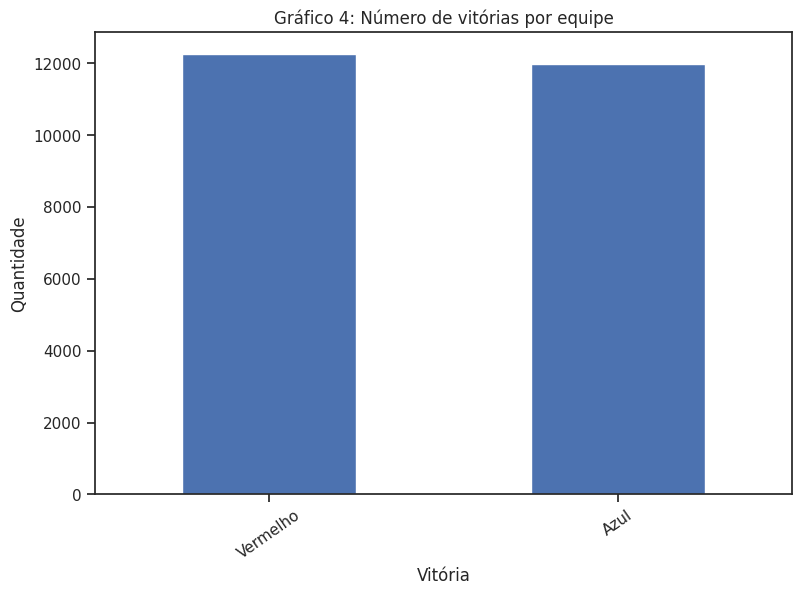

blueWin
0    12245
1    11980
Name: count, dtype: int64


In [105]:
# Quantidade de vitória dos dois times
winner = df['blueWin'].value_counts()

# Gráfico
plt.subplots(figsize=(9, 6))
sns.set_theme(style='ticks')
winner.plot(kind='bar')
plt.xticks(range(2), ['Vermelho', 'Azul'],rotation=35)
plt.xlabel('Vitória')
plt.ylabel('Quantidade')
plt.title('Gráfico 4: Número de vitórias por equipe')
plt.show()

print(winner)

fiz uma visualização geral das estatísticas descritivas com intuito de entender a disposição dos dados e achar possíveis outliers. Como imaginado, os recursos relacionados a wards colocadas possuem valores inconsistentes que acabam inflando a média.

Além disso, percebe-se tanto pela mediana quanto pelo gráfico que houve mais vitórias do time vermelho do que azul, com uma pequena diferença (265 vitórias a mais para o time vermelho).

In [103]:
# Calcular a média truncada para equipe azul
blue_trimmed_mean = trim_mean(df['blueTeamWardsPlaced'], proportiontocut=0.1)

# Calcular a média truncada para equipe vermelha
red_trimmed_mean = trim_mean(df['redTeamWardsPlaced'], proportiontocut=0.1)

print("Média truncada de blueTeamWardsPlaced:", blue_trimmed_mean)
print("Média truncada de redTeamWardsPlaced:", red_trimmed_mean)

Média truncada de blueTeamWardsPlaced: 31.035911459677003
Média truncada de redTeamWardsPlaced: 32.26876838140447


Ao analisar a média truncada, que exclui 10% das observações de cada extremidade dos dados, observa-se uma redução nos valores, aproximando-se mais dos valores encontrados na mediana.

## Correlação

In [81]:
# Calculando a correlação entre os recursos e a variável target
correlation_with_target = df.corr()['blueWin'].sort_values(ascending=False)

print("Correlação com a variável 'blueWin':")
print(correlation_with_target)

Correlação com a variável 'blueWin':
blueWin                          1.000000
blueTeamTotalGold                0.454814
blueTeamXp                       0.440802
blueTeamTotalKills               0.392896
redTeamTurretPlatesDestroyed     0.327606
blueTeamDragonKills              0.317602
blueTeamTowersDestroyed          0.316028
blueTeamTotalDamageToChamps      0.289770
blueTeamMinionsKilled            0.247761
blueTeamJungleMinions            0.209993
blueTeamFirstBlood               0.173681
blueTeamHeraldKills              0.108177
blueTeamControlWardsPlaced       0.060471
blueTeamInhibitorsDestroyed      0.037800
blueTeamWardsPlaced              0.006818
redTeamWardsPlaced              -0.000419
redTeamInhibitorsDestroyed      -0.023065
redTeamControlWardsPlaced       -0.052634
redTeamHeraldKills              -0.116562
redTeamJungleMinions            -0.209769
blueTeamTurretPlatesDestroyed   -0.261331
redTeamMinionsKilled            -0.266819
redTeamTowersDestroyed          -0.2676

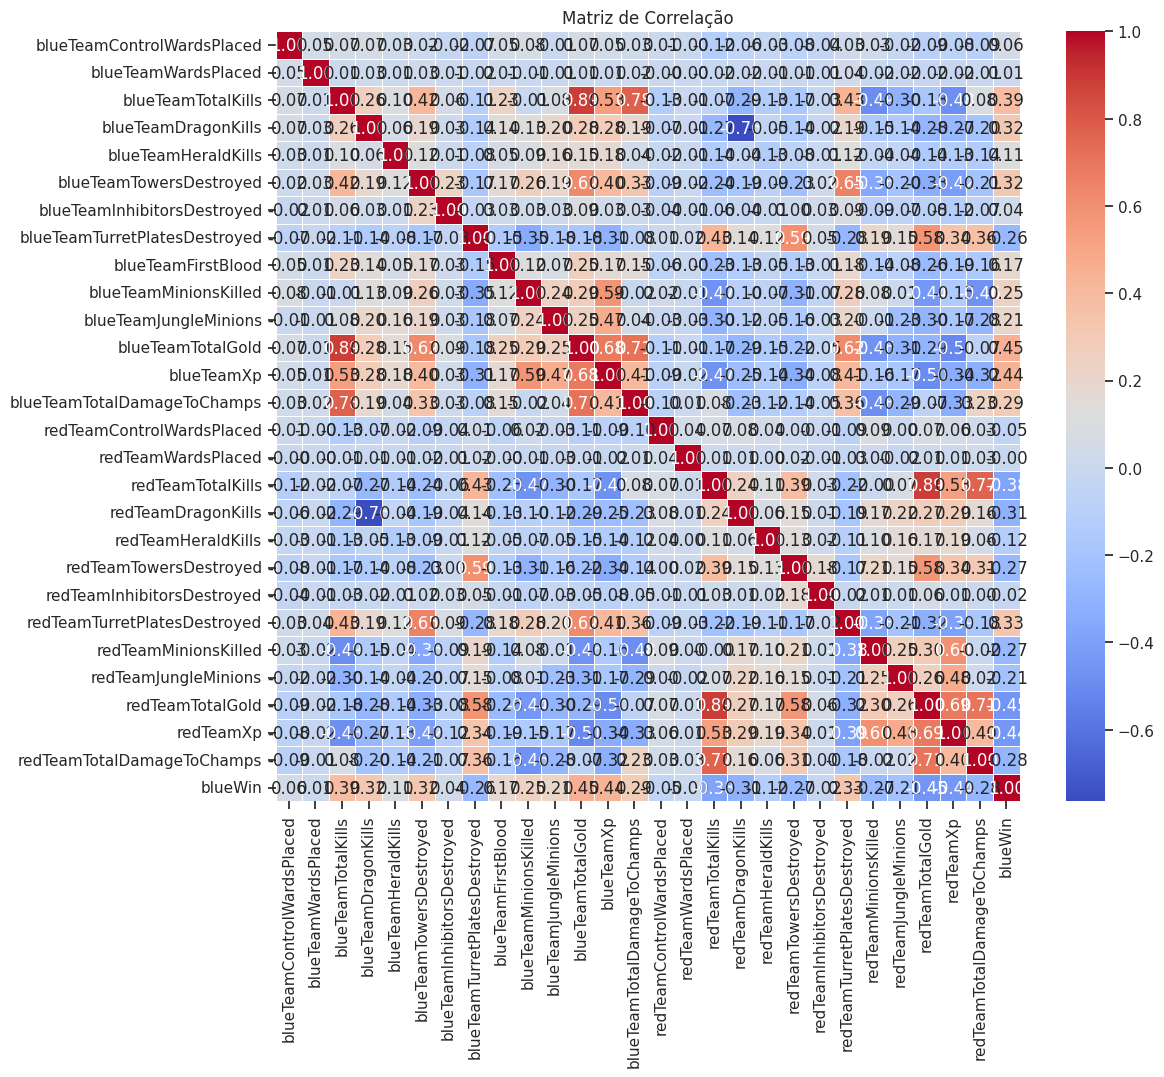

In [102]:
# Matriz de correlação
correlation_matrix = df.corr()

# Mapa de calor da matriz de correlação
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Matriz de Correlação')
plt.show()

Pelo teste de correlação das variáveis em relação ao target, observa-se que os maiores resultados estão relacionados ao total de ouro, total de XP e o total de abates, tanto para a equipe azul (de forma positiva) quanto para a equipe vermelha (de forma negativa).

Como o total de wards colocadas de ambos os times não possui tanto impacto nem na análise, nem nas outras variáveis, resolvi deixa-los no DataFrame.

# Preparação dos dados

In [83]:
# Definindo tamanho do conjunto e a seed
test_size = 0.20 # tamanho do conjunto de teste
seed = 50 # semente aleatória

# Definindo os recursos e a variável target
array = df.values
X = array[:,0:26] # Recursos
y = array[:,27] # Variável target (blueWin)

### Select feature

In [84]:
# Importância de Atributos com ExtraTrees

# Criação do modelo para seleção de atributos
modelo = ExtraTreesClassifier(n_estimators=100)
modelo.fit(X,y)

# Atributos originais
atributos_originais = df.columns[0:26]
print("Atributos Originais:", atributos_originais)

# Pontuação de importância para cada atributo
importancias = modelo.feature_importances_
print("Importâncias:", importancias)

# DataFrame com os atributos e suas importâncias
df_importancias = pd.DataFrame({
    'Atributo': atributos_originais,
    'Importância': importancias
})

# Ordenando os atributos por ordem decrescente de importância
df_importancias = df_importancias.sort_values(by='Importância', ascending=False)

# Atributos ranqueados por importância
print("\nAtributos Ranqueados por Importância:")
print(df_importancias.head(8))

Atributos Originais: Index(['blueTeamControlWardsPlaced', 'blueTeamWardsPlaced',
       'blueTeamTotalKills', 'blueTeamDragonKills', 'blueTeamHeraldKills',
       'blueTeamTowersDestroyed', 'blueTeamInhibitorsDestroyed',
       'blueTeamTurretPlatesDestroyed', 'blueTeamFirstBlood',
       'blueTeamMinionsKilled', 'blueTeamJungleMinions', 'blueTeamTotalGold',
       'blueTeamXp', 'blueTeamTotalDamageToChamps',
       'redTeamControlWardsPlaced', 'redTeamWardsPlaced', 'redTeamTotalKills',
       'redTeamDragonKills', 'redTeamHeraldKills', 'redTeamTowersDestroyed',
       'redTeamInhibitorsDestroyed', 'redTeamTurretPlatesDestroyed',
       'redTeamMinionsKilled', 'redTeamJungleMinions', 'redTeamTotalGold',
       'redTeamXp'],
      dtype='object')
Importâncias: [3.275e-02 3.255e-02 5.718e-02 4.169e-02 1.198e-02 3.039e-02 3.606e-05
 3.852e-02 1.834e-02 4.054e-02 3.554e-02 8.226e-02 6.905e-02 4.170e-02
 3.347e-02 3.237e-02 6.138e-02 3.927e-02 1.072e-02 3.047e-02 3.912e-06
 4.305e-02 3.986e

In [85]:
# Eliminação Recursiva de Atributos

# Criação do modelo
modelo = LogisticRegression(max_iter=200)

# Eliminação Recursiva de Atributos
rfe = RFE(modelo, n_features_to_select=6)
fit = rfe.fit(X, y)

# Print dos resultados
print("Atributos Originais:", df.columns[0:26])

# Atributos selecionados (marcados como True em "Atributos Selecionados" e com valor 1 em "Ranking dos Atributos")
print("\nAtributos Selecionados: %s" % fit.support_)
print("\nRanking de atributos: %s" % fit.ranking_)
print("\nQtd de melhores Atributos: %d" % fit.n_features_)
print("\nNomes dos Atributos Selecionados: %s" % fit.get_feature_names_out(input_features=df.columns[0:26]))


Atributos Originais: Index(['blueTeamControlWardsPlaced', 'blueTeamWardsPlaced',
       'blueTeamTotalKills', 'blueTeamDragonKills', 'blueTeamHeraldKills',
       'blueTeamTowersDestroyed', 'blueTeamInhibitorsDestroyed',
       'blueTeamTurretPlatesDestroyed', 'blueTeamFirstBlood',
       'blueTeamMinionsKilled', 'blueTeamJungleMinions', 'blueTeamTotalGold',
       'blueTeamXp', 'blueTeamTotalDamageToChamps',
       'redTeamControlWardsPlaced', 'redTeamWardsPlaced', 'redTeamTotalKills',
       'redTeamDragonKills', 'redTeamHeraldKills', 'redTeamTowersDestroyed',
       'redTeamInhibitorsDestroyed', 'redTeamTurretPlatesDestroyed',
       'redTeamMinionsKilled', 'redTeamJungleMinions', 'redTeamTotalGold',
       'redTeamXp'],
      dtype='object')

Atributos Selecionados: [False False  True  True False False False False False False  True False
 False False  True False  True  True False False False False False False
 False False]

Ranking de atributos: [11  5  1  1 16 15 19 13 17  4  1  8

In [86]:
# SelectKBest (Seleção Univariada)

# Seleção de atributos com SelectKBest
best_var = SelectKBest(score_func=f_classif, k=6)

# Função de pontuação em (X, y) e obtém os atributos selecionados
fit = best_var.fit(X, y)

# Reduz X para os atributos selecionados
features = fit.transform(X)

# Resultados
print('\nNúmero original de atributos:', X.shape[1])
print('\nNúmero reduzido de atributos:', features.shape[1])

# Atributos orginais
print("\nAtributos Originais:", df.columns[0:27])

# Pontuações de cada atributos e os escolhidos
np.set_printoptions(precision=3) # 3 casas decimais
print("\nScores dos Atributos Originais:", fit.scores_)
print("\nAtributos Selecionados:", best_var.get_feature_names_out(input_features=df.columns[0:26]))


Número original de atributos: 26

Número reduzido de atributos: 6

Atributos Originais: Index(['blueTeamControlWardsPlaced', 'blueTeamWardsPlaced',
       'blueTeamTotalKills', 'blueTeamDragonKills', 'blueTeamHeraldKills',
       'blueTeamTowersDestroyed', 'blueTeamInhibitorsDestroyed',
       'blueTeamTurretPlatesDestroyed', 'blueTeamFirstBlood',
       'blueTeamMinionsKilled', 'blueTeamJungleMinions', 'blueTeamTotalGold',
       'blueTeamXp', 'blueTeamTotalDamageToChamps',
       'redTeamControlWardsPlaced', 'redTeamWardsPlaced', 'redTeamTotalKills',
       'redTeamDragonKills', 'redTeamHeraldKills', 'redTeamTowersDestroyed',
       'redTeamInhibitorsDestroyed', 'redTeamTurretPlatesDestroyed',
       'redTeamMinionsKilled', 'redTeamJungleMinions', 'redTeamTotalGold',
       'redTeamXp', 'redTeamTotalDamageToChamps'],
      dtype='object')

Scores dos Atributos Originais: [8.890e+01 1.126e+00 4.422e+03 2.718e+03 2.868e+02 2.688e+03 3.466e+01
 1.776e+03 7.534e+02 1.584e+03 1.117e+03 6

In [87]:
# Variáveis selecionadas
variaveis = df[['blueTeamTotalKills', 'blueTeamTotalGold', 'blueTeamXp', 'redTeamTotalKills',
 'redTeamTotalGold', 'redTeamXp']]

# Matriz de correlação
matriz_correlacao = variaveis.corr()

# Imprimir a matriz de correlação
print(matriz_correlacao)

                    blueTeamTotalKills  blueTeamTotalGold  blueTeamXp  \
blueTeamTotalKills            1.000000           0.888039    0.532202   
blueTeamTotalGold             0.888039           1.000000    0.683719   
blueTeamXp                    0.532202           0.683719    1.000000   
redTeamTotalKills            -0.067602          -0.173217   -0.470522   
redTeamTotalGold             -0.177917          -0.291506   -0.497705   
redTeamXp                    -0.484295          -0.509350   -0.339405   

                    redTeamTotalKills  redTeamTotalGold  redTeamXp  
blueTeamTotalKills          -0.067602         -0.177917  -0.484295  
blueTeamTotalGold           -0.173217         -0.291506  -0.509350  
blueTeamXp                  -0.470522         -0.497705  -0.339405  
redTeamTotalKills            1.000000          0.885745   0.528713  
redTeamTotalGold             0.885745          1.000000   0.689052  
redTeamXp                    0.528713          0.689052   1.000000  


A seleção univariada foi escolhida por destacar os atributos com maior relação com a variável target. Essa abordagem é comumente utilizada quando se tem variáveis de saída categóricas e variáveis de entrada numéricas. Selecionei os 6 melhores atributos com base na correlação entre os recursos e o target. No entanto, observa-se a presença de uma possível multicolinearidade entre algumas variáveis explicativas.

## Separação da base dados em treino e teste com o método holdout e validação cruzada

In [88]:
# Divisão em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(features, y,
                                                    test_size=test_size,
                                                    shuffle=True,
                                                    random_state=seed,
                                                    stratify=y)

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed)

# Modelo e treinamento

### Criação e avaliação do modelo: linha base

Para determinar os modelos mais adequados para minha base de dados, conduzi experimentos (como mostrado em aula) utilizando validação cruzada e holdout para avaliar o desempenho dos diferentes modelos disponíveis. Inicialmente, testei os modelos com seus hiperparâmetros padrão:

LR: 0.750980 (0.007954)
KNN: 0.712642 (0.009031)
CART: 0.664912 (0.013001)
NB: 0.748865 (0.007257)
SVM: 0.750826 (0.007200)
Bagging: 0.737152 (0.009089)
RF: 0.737307 (0.009457)
ET: 0.735604 (0.010795)
Ada: 0.748555 (0.007231)
GB: 0.749845 (0.006065)
Voting: 0.750722 (0.007745)


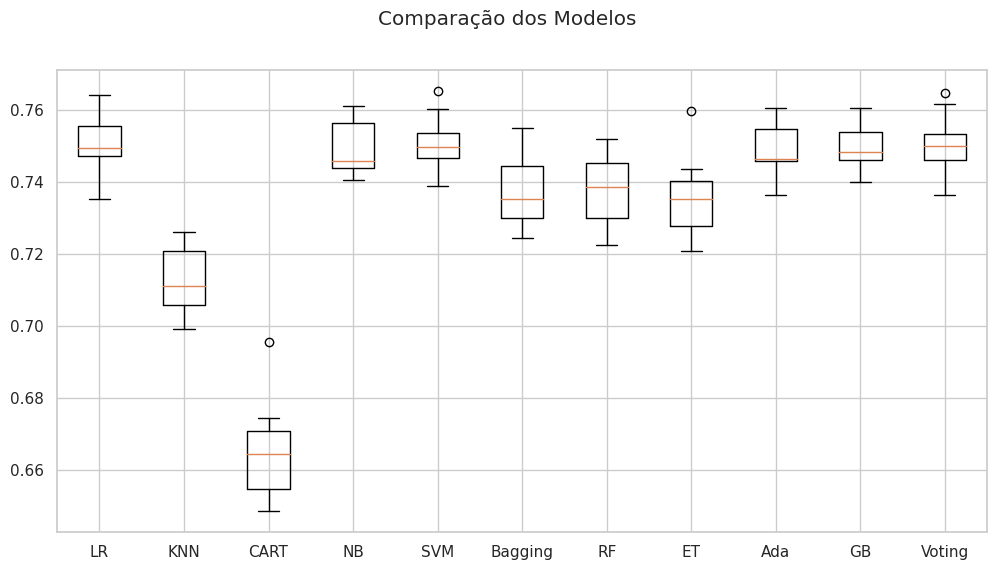

In [89]:
np.random.seed(50) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(base_estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(12,6))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Criação e avaliação de modelos: dados padronizados e normalizados

Também apliquei técnicas de padronização e normalização nos hiperparâmetros dos modelos para evitar problemas de data leakage para fins comparativos:

LR-orig: 0.751 (0.008)
KNN-orig: 0.713 (0.009)
CART-orig: 0.665 (0.013)
NB-orig: 0.749 (0.007)
SVM-orig: 0.751 (0.007)
Bag-orig: 0.737 (0.009)
RF-orig: 0.737 (0.009)
ET-orig: 0.736 (0.011)
Ada-orig: 0.749 (0.007)
GB-orig: 0.750 (0.006)
Vot-orig: 0.751 (0.008)
LR-padr: 0.752 (0.007)
KNN-padr: 0.716 (0.015)
CART-padr: 0.667 (0.012)
NB-padr: 0.749 (0.007)
SVM-padr: 0.751 (0.008)
Bag-padr: 0.734 (0.006)
RF-padr: 0.738 (0.008)
ET-padr: 0.737 (0.010)
Ada-padr: 0.749 (0.007)
GB-padr: 0.750 (0.006)
Vot-padr: 0.751 (0.008)
LR-norm: 0.751 (0.007)
KNN-norm: 0.714 (0.012)
CART-norm: 0.664 (0.014)
NB-norm: 0.749 (0.007)
SVM-norm: 0.751 (0.008)
Bag-norm: 0.735 (0.009)
RF-norm: 0.740 (0.009)
ET-norm: 0.735 (0.008)
Ada-norm: 0.749 (0.007)
GB-norm: 0.750 (0.006)
Vot-norm: 0.751 (0.008)


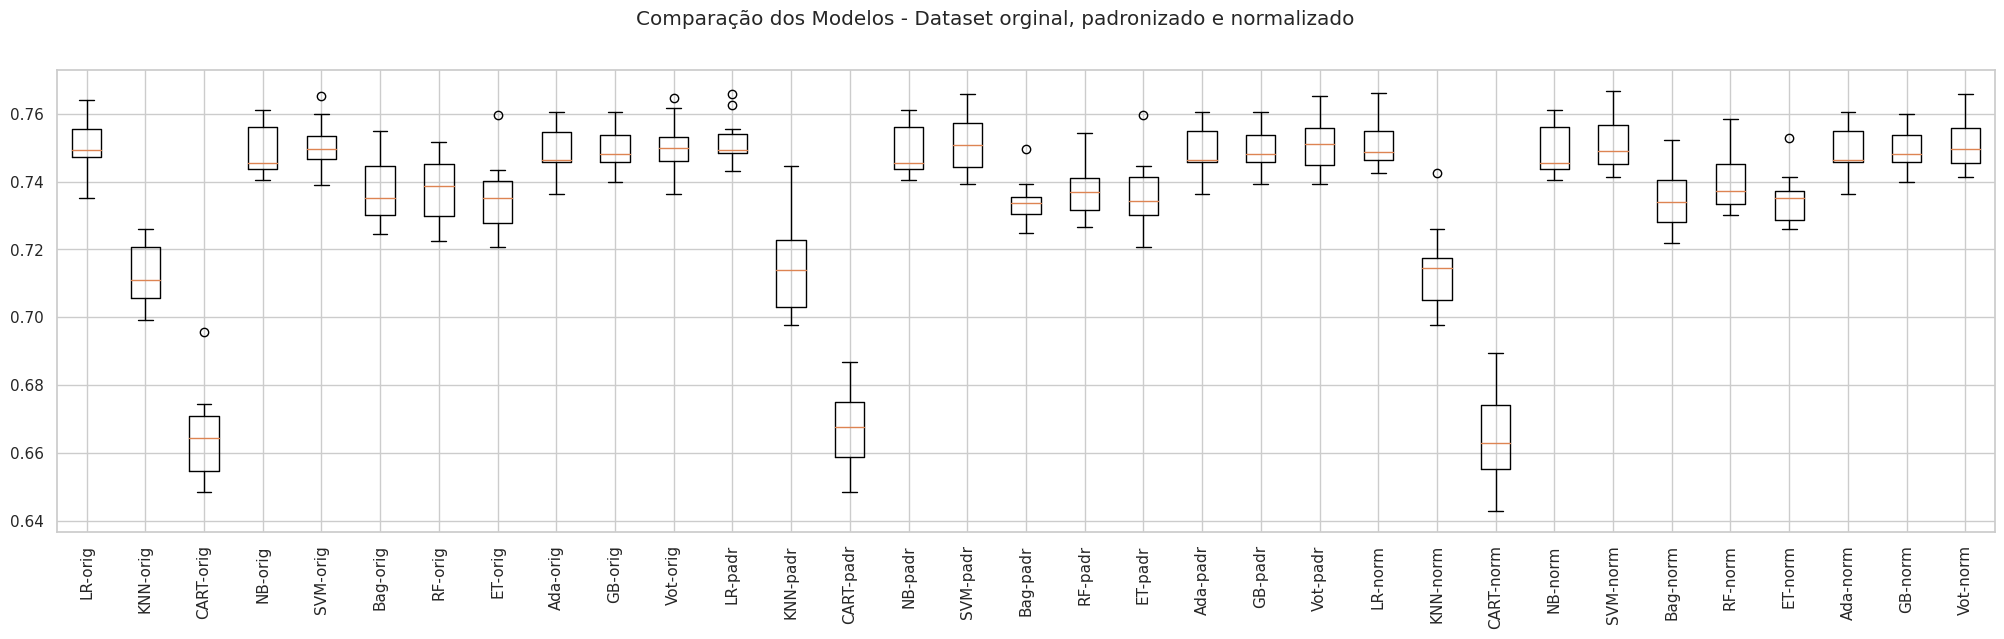

In [90]:
np.random.seed(50) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(base_estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

Pela análise dos resultados, optei por treinar o modelo de regressão logística, que apresentou a maior acurácia e o menor desvio padrão, mesmo considerando sua sensibilidade à multicolinearidade, destacando o LR padronizado (LR-padr).

#### Otimização dos hiperparâmetros

In [91]:
# Otimizar LR

np.random.seed(50) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
LR = ('LR', LogisticRegression(max_iter=200))
standard_scaler = ('standard_scaler', StandardScaler())
min_max_scaler = ('min_max_scaler', MinMaxScaler())

pipelines.append(('LR-orig', Pipeline(steps=[LR])))
pipelines.append(('LR-padr', Pipeline(steps=[standard_scaler, LR])))
pipelines.append(('LR-norm', Pipeline(steps=[min_max_scaler, LR])))

# Definindo os parâmetros para otimização
param_grid = {
    'LR__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Parâmetro de regularização C
    'LR__solver': ['liblinear', 'lbfgs', 'saga'], # Método de otimização
    'LR__penalty': ['l1', 'l2','elasticnet'], # Termo de regularização
}

# GridSearchCV em cada pipeline
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)

# Imprimir a acurácia de cada modelo
for name, _ in pipelines:
    print(f"{name}: {grid.best_score_:.5f} ({grid.best_params_})")

LR-orig: 0.75206 ({'LR__C': 0.001, 'LR__penalty': 'l2', 'LR__solver': 'liblinear'})
LR-padr: 0.75206 ({'LR__C': 0.001, 'LR__penalty': 'l2', 'LR__solver': 'liblinear'})
LR-norm: 0.75206 ({'LR__C': 0.001, 'LR__penalty': 'l2', 'LR__solver': 'liblinear'})


Ao otimizar os hiperparâmetros, o objetivo é abordar diversos aspectos do modelo de regressão logística. Isso inclui reduzir a multicolinearidade entre as variáveis explicativas, aprimorar sua capacidade de generalização para novos dados, evitar o overfitting e melhorar a interpretabilidade dos resultados. Utilizando técnicas como a penalidade L2 e o método de otimização 'liblinear', é possível alcançar uma melhor adaptação aos dados e uma modelagem mais precisa para problemas de regressão logística.

# Avaliação do modelo com o conjunto de testes

In [92]:
# LR PADRONIZADA

# Preparação do modelo
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
model = LogisticRegression(max_iter=200)
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))

0.76656346749226


In [93]:
# Configurações dos parâmetros otimizados para cada tipo de modelo
params_orig = {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
params_padr = {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
params_norm = {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}

# Definição dos pipelines com pré-processamento e modelo
pipe_orig = Pipeline([('LR', LogisticRegression(**params_orig, max_iter=200))])
pipe_padr = Pipeline([('scaler', StandardScaler()), ('LR', LogisticRegression(**params_padr, max_iter=200))])
pipe_norm = Pipeline([('scaler', MinMaxScaler()), ('LR', LogisticRegression(**params_norm, max_iter=200))])

# Lista de modelos e seus nomes para iteração
models = [('LR Original', pipe_orig), ('LR Padronizado', pipe_padr), ('LR Normalizado', pipe_norm)]

# Iteração sobre cada modelo para treinar e avaliar
for name, model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"Acurácia do modelo {name} otimizado: {accuracy:.5f}\n")

Acurácia do modelo LR Original otimizado: 0.76533

Acurácia do modelo LR Padronizado otimizado: 0.76140

Acurácia do modelo LR Normalizado otimizado: 0.76099



Como a otimização dos hiperparâmetros produziu resultados semelhantes para todos os tipos de dados, decidi examinar a acurácia do modelo padronizado sem otimização, que tinha sido selecionado anteriormente. Assim, descobri que Percebe-se que independentemente da otimização dos hiperparâmetros, a acurácia do modelo permaneceu em torno de 76%. Especificamente, o modelo de regressão logística padronizado, não otimizado, alcançou uma acurácia de aproximadamente 76,6%, enquanto o modelo otimizado ficou em torno de 76,1%.

Já o modelo otimizado que usava diretamente os dados de treino, sem nenhum processo de padronização ou normalização, teve uma acurácia de cerca de 76,5%. Assim, o modelo de regressão logística padronizado, sem otimização, foi o mais eficaz em termos de acurácia, conforme indicado pelos testes realizados, mostrando que a padronização dos dados foi bastante positiva.

Explorar modelos alternativos menos suscetíveis às características específicas dos dados pode resultar em melhorias adicionais no desempenho do modelo. Em trabalhos futuros, planejo realizar uma análise detalhada dos diversos modelos disponíveis, a fim de identificar qual deles se adapta melhor à natureza desses dados e oferece a eficácia mais robusta.

